In [1]:
from qiskit.circuit import QuantumCircuit

In [2]:
from QML_utils import *

### 2-qubits unitaries

In [9]:
Up = UnitaryNlocal2(reps=2, name=r'$U_p$', parameter_prefix=r'$U_{px}$')

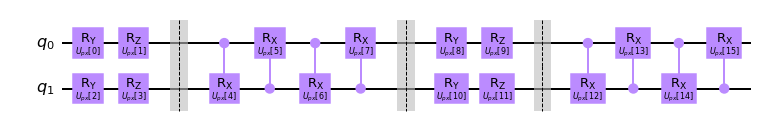

In [10]:
Up.decompose().draw('mpl')

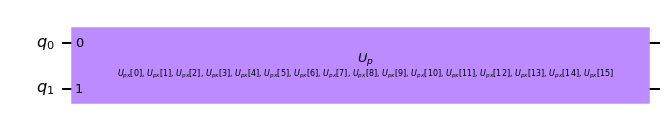

In [11]:
Up.draw('mpl')

In [13]:
Up.num_parameters

16

### 4-qubits Unitary

In [14]:
Uo1 = UnitaryNlocal4(reps=3, name=r'$U_o^1$', parameter_prefix=r'$U_o^1x$')

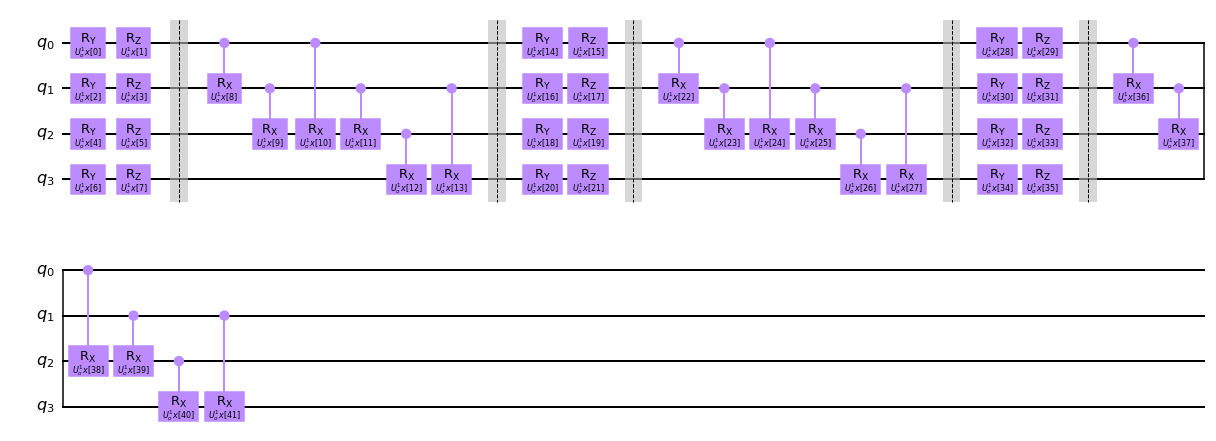

In [16]:
Uo1.decompose().draw('mpl')

In [17]:
Uo1.num_parameters

42

### Uniformly Controlled Unitary

In [18]:
CU200 = CU2Nlocal(controlbit=[0,0], reps=1, name=r"$U_t^{'''}$", parameter_prefix=r"$U_t^{'''}x$")

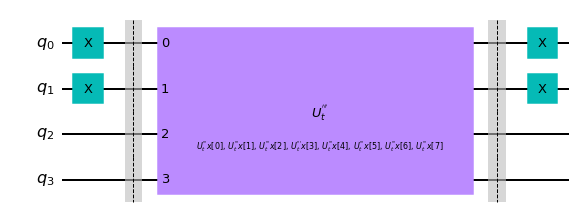

In [20]:
CU200.decompose().draw('mpl')

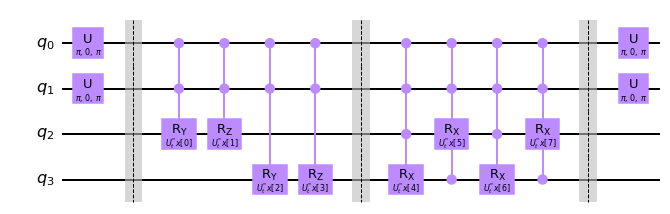

In [22]:
CU200.decompose().decompose().decompose().draw('mpl')

In [23]:
Ut = UniformControl2(reps=2, name=r"$U_t$", parameter_prefix=r"$U_tx$")

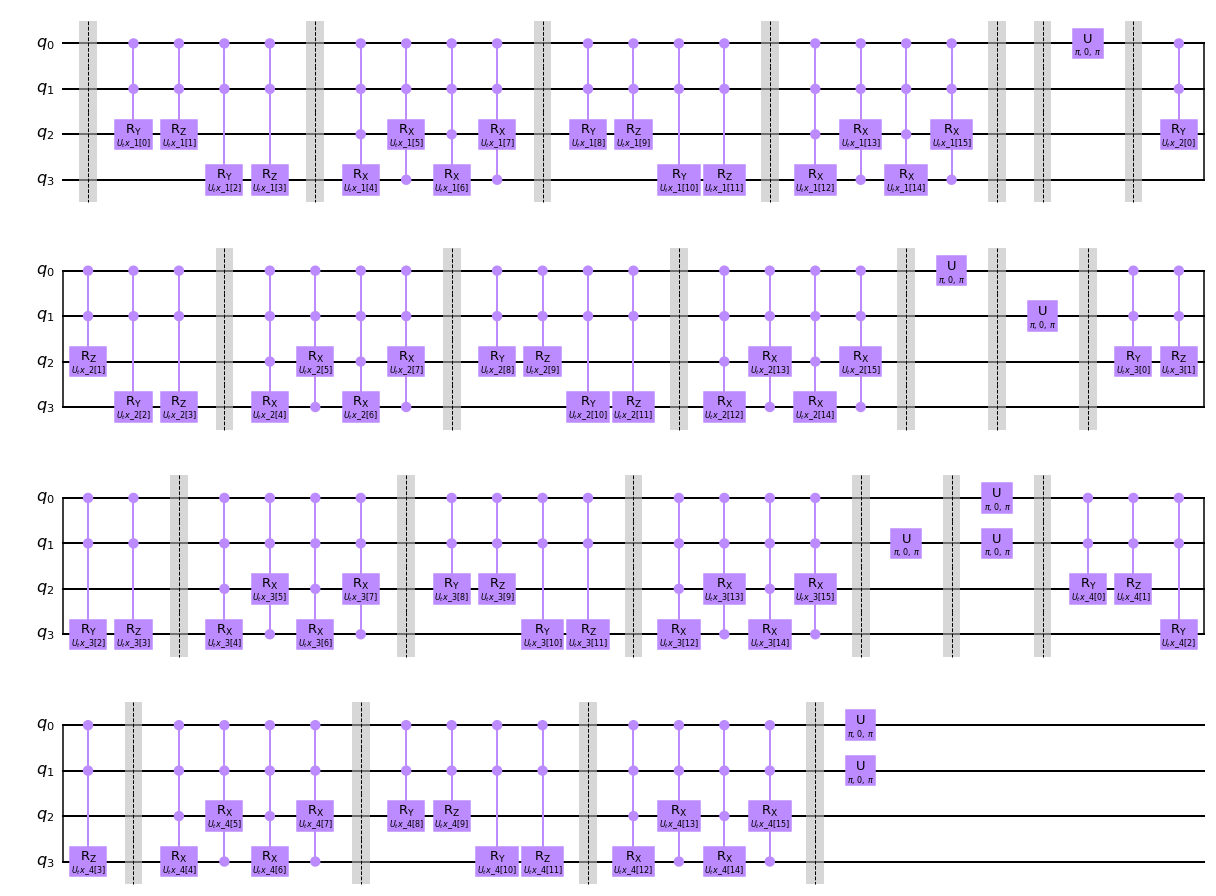

In [26]:
Ut.decompose().decompose().decompose().decompose().draw('mpl')

### BBQC

In [27]:
Up = UnitaryNlocal2(reps=2, name=r"$U_p$", parameter_prefix=r"$U_px$")

In [29]:
Ut2 = UniformControl2(reps=2, name=r"$U_t^{(2)}$", parameter_prefix=r"$U_t^{(2)}x$")

In [30]:
Uo1 = UnitaryNlocal4(reps=3, name=r"$U_o^{(1)}$", parameter_prefix=r"$U_o^{(1)}$")

In [31]:
Ut3 = UniformControl2(reps=2, name=r"$U_t^{(3)}$", parameter_prefix=r"$U_t^{(3)}x$")

In [33]:
Uo2 = UnitaryNlocal4(reps=3, name=r"$U_o^{(2)}$", parameter_prefix=r"$U_o^{(2)}$")
Uo3 = UnitaryNlocal4(reps=3, name=r"$U_o^{(3)}$", parameter_prefix=r"$U_o^{(3)}$")
Uo4 = UnitaryNlocal4(reps=3, name=r"$U_o^{(4)}$", parameter_prefix=r"$U_o^{(4)}$")

In [34]:
Ut4 = UniformControl2(reps=2, name=r"$U_t^{(4)}$", parameter_prefix=r"$U_t^{(4)}x$")

In [57]:
from qiskit import ClassicalRegister, QuantumRegister

In [58]:
BBQC = QuantumCircuit(QuantumRegister(16), ClassicalRegister(8))

In [59]:
BBQC.append(Up, [0,1])

In [60]:
BBQC.append(Ut2, [0,1,4,5])
BBQC.append(Ut3, [4,5,8,9])
BBQC.append(Ut4, [8,9,12,13])

In [61]:
BBQC.append(Uo1, [0,1,2,3])
BBQC.append(Uo2, [4,5,6,7])
BBQC.append(Uo3, [8,9,10,11])
BBQC.append(Uo4, [12,13,14,15])

In [63]:
BBQC.num_parameters

376

In [64]:
BBQC.measure([2,3,6,7,10,11,14,15], [0,1,2,3,4,5,6,7])

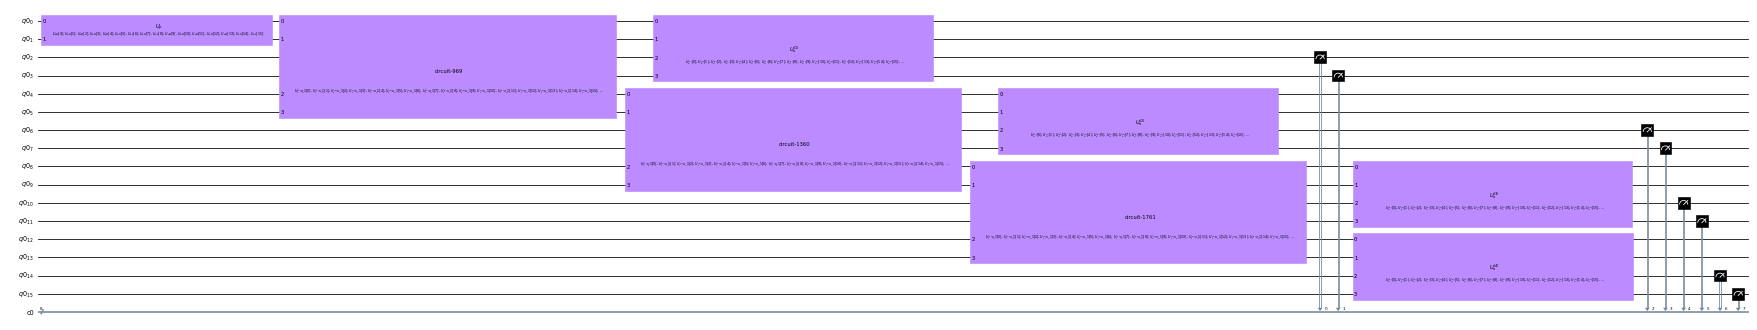

In [65]:
BBQC.draw('mpl',scale=0.4, fold=1, vertical_compression="low")

In [212]:
BBQC.decompose().decompose().decompose().draw('mpl')

### The Expectation  

In [67]:
from qiskit.providers.aer import AerSimulator

In [68]:
simulator = AerSimulator(method='matrix_product_state')

In [81]:
from qiskit import transpile, assemble

In [70]:
tcirc = transpile(BBQC, simulator)

In [108]:
import time
import numpy as np

In [74]:
x = 2*np.pi*np.random.uniform(size=[BBQC.num_parameters])

In [75]:
value_dict = dict(zip(BBQC.parameters, x))

In [79]:
len(value_dict)

376

In [80]:
tcirc.num_parameters

376

In [89]:
qobj = assemble(tcirc, shots=100, parameter_binds = [value_dict])

In [90]:
start_time = time.time()
result = simulator.run(qobj).result()
print(time.time() - start_time)

0.14058399200439453


In [91]:
result.get_counts()

{'00101110': 1,
 '00110000': 2,
 '11010110': 1,
 '00111010': 1,
 '11111100': 1,
 '11101110': 1,
 '01101111': 1,
 '10100111': 1,
 '00101101': 1,
 '10111011': 1,
 '00101010': 1,
 '00011101': 1,
 '10111001': 1,
 '01101011': 1,
 '10010011': 1,
 '00111101': 1,
 '01111001': 1,
 '00001001': 1,
 '01010011': 1,
 '01110011': 1,
 '10010111': 1,
 '00011000': 1,
 '10101000': 1,
 '00000010': 2,
 '11011011': 1,
 '01100010': 2,
 '01100110': 1,
 '00011010': 2,
 '11001010': 1,
 '00100110': 1,
 '00100001': 2,
 '01101010': 1,
 '00110101': 1,
 '00001111': 1,
 '00110010': 2,
 '00011110': 3,
 '11111010': 1,
 '00011111': 1,
 '01111110': 2,
 '10110110': 1,
 '00101001': 2,
 '11011010': 2,
 '11100010': 1,
 '00111000': 1,
 '00111011': 1,
 '00001100': 2,
 '11110110': 1,
 '00101000': 1,
 '00001010': 4,
 '01000010': 1,
 '01111010': 3,
 '11001001': 1,
 '11000001': 1,
 '10001111': 1,
 '11110001': 3,
 '10001110': 2,
 '11101111': 1,
 '01100011': 1,
 '11111101': 3,
 '11010011': 1,
 '10010010': 1,
 '11110000': 4,
 '000011

In [92]:
from qiskit.visualization import plot_histogram

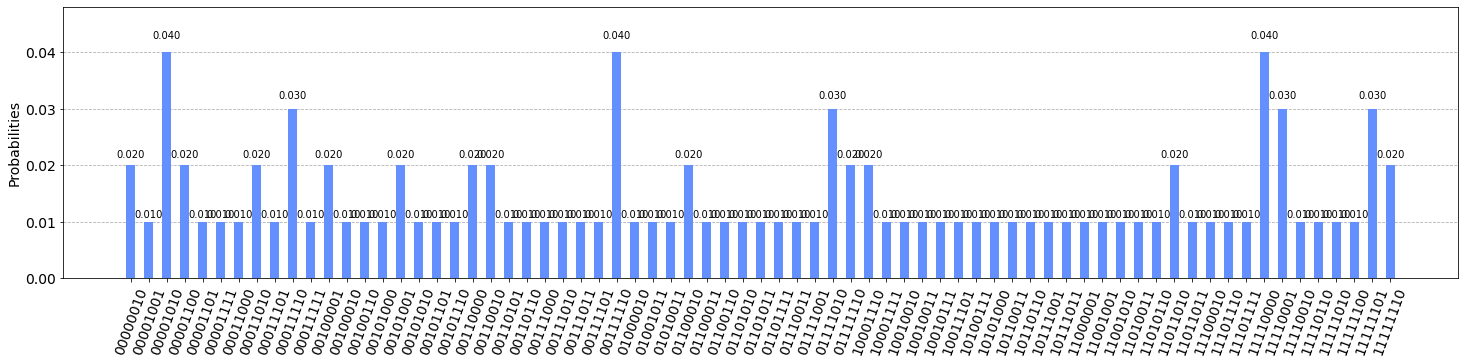

In [96]:
plot_histogram(result.get_counts(), figsize=[25,5], )

In [147]:
counts, etime = measure_result(BBQC, simulator, value_dict, n_shots=1000)

In [148]:
print(etime)

4.433305025100708


In [ ]:
value_dict = dict(zip(BBQC.parameters, x))

### Prepare some data

In [116]:
import pandas as pd

In [120]:
import ast

In [117]:
traindata = pd.read_csv('../dataset/pgs4_train.csv')

In [132]:
test = eval(traindata["sequence"][0])

In [133]:
test

[2, 2, 1, 1]

In [134]:
type(test)

list

In [135]:
def convert_str(genelist):
    output = ""
    for i in genelist:
        if i == 0:
            output += '00'
        if i == 1:
            output += '01'
        if i == 2:
            output += '10'
        if i == 3:
            output += '11'
    return output

In [137]:
binary_traindata = [convert_str(eval(i)) for i in traindata["sequence"]]

In [139]:
len(binary_traindata)

79

### Negative loglikelihood

In [155]:
a = counts.get(binary_traindata[0])

In [158]:
a is None

True

In [145]:
counts

{'00011111': 1,
 '11110011': 1,
 '00111101': 1,
 '10001010': 1,
 '11000010': 1,
 '00010111': 1,
 '11111101': 1,
 '00111001': 1,
 '11110101': 1,
 '00010010': 2,
 '01011010': 1,
 '00110011': 1,
 '11110000': 1,
 '01111010': 1,
 '10111000': 1,
 '00011001': 1,
 '01111101': 1,
 '11111001': 2,
 '00011011': 1,
 '00001011': 1,
 '11101011': 2,
 '00100010': 3,
 '01100001': 1,
 '11011110': 2,
 '01101010': 1,
 '01000001': 1,
 '10111001': 1,
 '00110001': 2,
 '00011101': 2,
 '11001010': 2,
 '00011010': 1,
 '11101010': 1,
 '01001110': 1,
 '11010010': 2,
 '11110010': 2,
 '10111110': 2,
 '01110001': 1,
 '00110010': 4,
 '10000001': 1,
 '00011110': 2,
 '11111010': 1,
 '00101111': 1,
 '00111110': 2,
 '11001001': 1,
 '00100101': 1,
 '10101101': 1,
 '00111011': 2,
 '11010011': 1,
 '01100010': 2,
 '10101111': 1,
 '00101010': 1,
 '10111011': 1,
 '11101110': 2,
 '11100011': 2,
 '11001011': 1,
 '10111010': 2,
 '00000010': 1,
 '00101001': 1,
 '11011010': 1,
 '10110100': 1,
 '00110110': 1,
 '10110001': 1,
 '001110

In [ ]:
binary_traindata[2]

In [161]:
def NLL(counts, databatch, n_shots=1000):
    NLL = 0.
    for i in databatch:
        temp = counts.get(i)
        if temp is None:
            NLL += 2*np.log2(n_shots)
        else:
            NLL += -np.log2(temp/n_shots)
    return NLL/len(databatch)

In [162]:
len(binary_traindata)

79

In [163]:
I = np.random.choice(79, size=8)

In [165]:
binary_traindata_array = np.array(binary_traindata)

In [166]:
databatch = binary_traindata_array[I]

In [168]:
NLL(counts, databatch)

10.599958442005672

In [184]:
x = 2*np.pi*np.random.uniform(size=BBQC.num_parameters)

In [185]:
def measure_result(BBQC, simulator, x, n_shots=100):
    start_time = time.time()
    value_dict = dict(zip(BBQC.parameters, x))
    tcirc = transpile(BBQC, simulator)
    qobj = assemble(tcirc, shots=n_shots, parameter_binds = [value_dict])
    result = simulator.run(qobj).result()
    elapse_time = time.time() - start_time
    
    return result.get_counts(), elapse_time

In [186]:
epsilon = 0.2* 2*np.pi*np.random.uniform(size=BBQC.num_parameters)
counts1, _ = measure_result(BBQC, simulator, x+epsilon, n_shots=1000)
counts2, _ = measure_result(BBQC, simulator, x-epsilon, n_shots=1000)

In [191]:
NLL_plus = NLL(counts1, databatch)
NLL_minus = NLL(counts2, databatch)

In [195]:
(NLL_plus - NLL_minus)/2*epsilon

array([0.35051673, 0.03797129, 0.3934775 , 0.19300749, 0.26461039,
       0.22543008, 0.30653865, 0.3528916 , 0.43294351, 0.25466886,
       0.23658718, 0.26933854, 0.01684804, 0.14184213, 0.07611609,
       0.11341011, 0.24937996, 0.123673  , 0.15207722, 0.38944971,
       0.26083703, 0.39049482, 0.33973482, 0.12450719, 0.09424114,
       0.35093612, 0.16073343, 0.29119159, 0.45028162, 0.26981569,
       0.09557482, 0.41146541, 0.09976405, 0.4244998 , 0.03317761,
       0.24935303, 0.37603852, 0.44081351, 0.39228525, 0.31282339,
       0.06411335, 0.01480515, 0.23768734, 0.44809779, 0.23774695,
       0.16641463, 0.38848564, 0.34051488, 0.14238318, 0.13075549,
       0.33078893, 0.39562333, 0.17015414, 0.39385226, 0.18527665,
       0.35126126, 0.32000904, 0.17544902, 0.20069148, 0.32851541,
       0.07326713, 0.07447052, 0.441421  , 0.11181517, 0.18842362,
       0.13286783, 0.44768852, 0.22165195, 0.16580184, 0.26768216,
       0.28707208, 0.21130783, 0.04267101, 0.2010301 , 0.04149

In [193]:
NLL_minus

9.095905757294126

In [194]:
NLL_plus

9.81526669506456

In [196]:
def gradient(x, databatch, BBQC, simulator, n_shots=1000, eps=0.2):
    epsilon = eps*2*np.pi*np.random.uniform(size=BBQC.num_parameters)
    countsplus, _ = measure_result(BBQC, simulator, x+epsilon, n_shots=1000)
    countsminus, _ = measure_result(BBQC, simulator, x-epsilon, n_shots=1000)
    counts, _ = measure_result(BBQC, simulator, x, n_shots=1000)
    
    NLL_plus = NLL(countsplus, databatch)
    NLL_minus = NLL(countsminus, databatch)
    FD_dfdx = (NLL_plus - NLL_minus)/2*epsilon
    
    NLL_x =  NLL(counts, databatch)
    
    return FD_dfdx, NLL_x

In [201]:
from tqdm.notebook import tqdm

In [202]:
def training(initial_x, traindata, BBQC, similator, batchsize=8, n_steps=50, loss_track=[], alpha=0.01):
    
    N = len(traindata)
    x = initial_x
    
    for i in tqdm(range(n_steps)):
        I = np.random.choice(N, size=batchsize)
        databatch = traindata[I]
        dfdx, NLL_x = gradient(x, databatch, BBQC, simulator)
        loss_track.append(NLL_x)
        x = x - alpha * dfdx
    
    return x, loss_track

In [203]:
x_opt, loss_track = training(x, binary_traindata_array, BBQC, simulator)

  0%|          | 0/50 [00:00<?, ?it/s]

In [204]:
import matplotlib.pyplot as plt

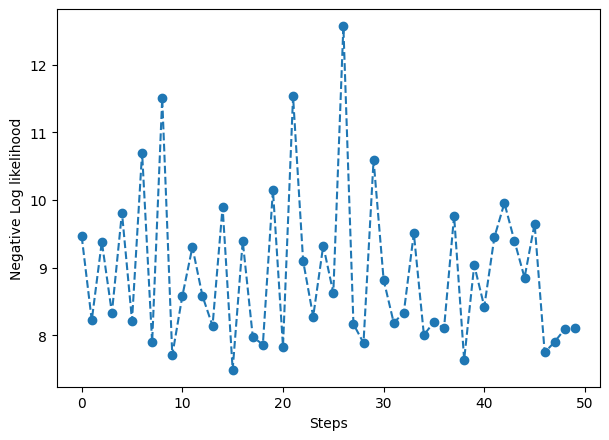

In [211]:
fig = plt.figure(figsize=[7,5], dpi=100)
plt.plot(loss_track, 'o--')
plt.xlabel("Steps")
plt.ylabel("Negative Log likelihood")
plt.show()

In [213]:
x

array([0.92148511, 6.21111654, 2.82493827, 0.7946777 , 2.82909317,
       0.15217384, 2.63568379, 0.28676347, 0.41991598, 4.09626677,
       2.43651703, 0.76024351, 0.56420553, 3.42992014, 0.09024392,
       4.72547924, 4.68030769, 5.01068549, 5.13752213, 4.94306283,
       0.13836249, 0.2614046 , 4.03245022, 4.43219144, 4.96226868,
       1.80106829, 3.7367614 , 1.30130387, 5.19458517, 1.88875505,
       0.53656885, 4.51107525, 3.67059615, 3.80669991, 2.74872934,
       2.31957317, 0.97853604, 2.17899841, 5.34739398, 1.26279848,
       0.55732655, 0.64029683, 3.23306612, 3.37851971, 2.34828777,
       4.47496176, 2.54577324, 0.58809351, 1.61097756, 3.97326756,
       5.44870925, 0.6519571 , 5.25871181, 2.9125039 , 2.91293502,
       2.97380542, 3.13260505, 0.47922254, 0.0908086 , 5.78267599,
       4.09977944, 5.68441953, 6.11239706, 1.14789487, 6.05016896,
       0.15350609, 2.23724983, 3.43195356, 0.64477587, 3.75540573,
       3.96334896, 4.21480334, 4.16645416, 2.39141596, 2.18481

In [214]:
x_opt

array([0.98385035, 6.28864785, 2.89006278, 0.91779869, 2.92551182,
       0.20627609, 2.69890608, 0.36917844, 0.46134002, 4.20169524,
       2.50544755, 0.87793804, 0.65604426, 3.49001171, 0.16959072,
       4.78442903, 4.79856377, 5.10552744, 5.21651307, 4.97882542,
       0.19412636, 0.31794753, 4.12598742, 4.52955718, 5.01494534,
       1.91929066, 3.78950063, 1.39629825, 5.29131753, 1.91887456,
       0.62950119, 4.59740968, 3.77350403, 3.87566396, 2.81718841,
       2.38366476, 1.1002568 , 2.2579597 , 5.3688481 , 1.31363715,
       0.63628855, 0.68103062, 3.31691394, 3.48134707, 2.42831046,
       4.53530499, 2.69591418, 0.59714706, 1.65879561, 4.01280551,
       5.50630576, 0.74588672, 5.3592138 , 2.9955244 , 2.91650358,
       3.05365123, 3.17075991, 0.56231957, 0.19424966, 5.8362084 ,
       4.15981703, 5.76781503, 6.17463808, 1.257453  , 6.0953283 ,
       0.24651274, 2.30879706, 3.5371851 , 0.72950731, 3.80740244,
       4.07853207, 4.23839655, 4.24393969, 2.49084568, 2.25928